In [1]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./datasets/manhattan.csv")

In [7]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [9]:
from sklearn.model_selection import train_test_split

In [14]:
#selecting some columns(independent variables) and making a new data frame

In [12]:
x = df[['bedrooms','bathrooms',
'size_sqft',
'min_to_subway',
'floor',
'building_age_yrs',
'no_fee',
'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',
'has_patio',
'has_gym']]

In [15]:
#selecting rent and storing it in y(dependent variable)

In [16]:
y = df[['rent']]

In [17]:
# splitting the data set into test and train

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=6)

In [21]:
x_train.shape

(2831, 14)

In [22]:
x_test.shape

(708, 14)

In [23]:
y_train.shape

(2831, 1)

In [24]:
y_test.shape

(708, 1)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
mlr = LinearRegression()

In [27]:
mlr.fit(x_train,y_train)

LinearRegression()

In [30]:
mlr.intercept_

array([-344.68587986])

In [36]:
mlr.coef_[0]

array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

In [37]:
y_predict = mlr.predict(x_test)

In [40]:
#example
# the below are the values taken as example from the dataset of one of the customers. it is a 1bed/1bath house
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
#creating scatter plot for predicted rent vs actual rent
#The x-axis represent actual rent prices and the y-axis represent predicted rent prices.

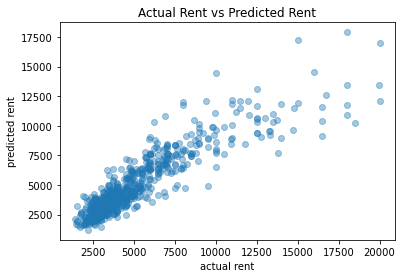

In [46]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual rent")
plt.ylabel("predicted rent")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [47]:
#Creating a scatterplot of size_sqft and rent

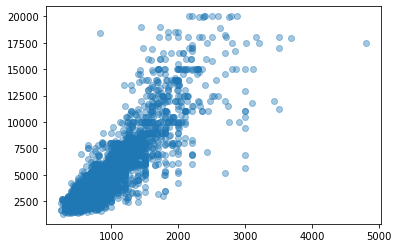

In [48]:
plt.scatter(df[['size_sqft']],df[['rent']],alpha=0.4)

In [49]:
#Creating a scatterplot of min_to_subway  and rent

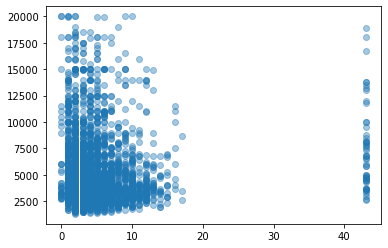

In [50]:
plt.scatter(df[['min_to_subway']],df[['rent']],alpha=0.4)

In [51]:
x.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


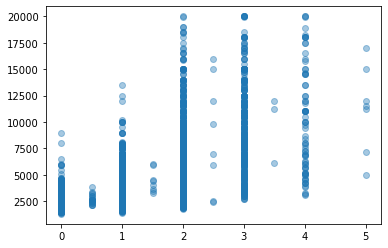

In [52]:
plt.scatter(df[['bedrooms']],df[['rent']],alpha=0.4)

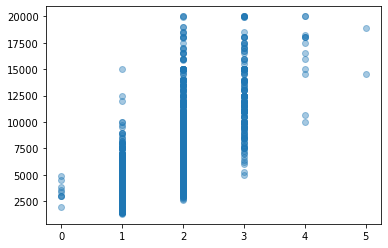

In [53]:
plt.scatter(df[['bathrooms']],df[['rent']],alpha=0.4)

In [54]:
mlr.coef_[0]

array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

In [55]:
x.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

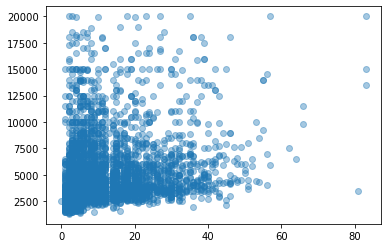

In [56]:
plt.scatter(df[['floor']],df[['rent']],alpha=0.4)

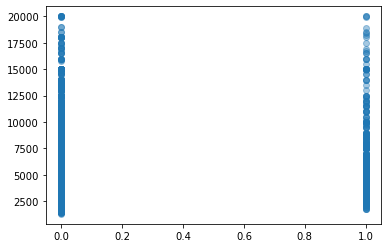

In [58]:
plt.scatter(df[['has_gym']],df[['rent']],alpha=0.4)

In [59]:
#Evaluating the Model's Accuracy

In [61]:
mlr.score(x_train,y_train)

0.7725460559817883

In [64]:
print(mlr.score(x_test,y_test))

0.8050371975357675


In [63]:
#scatter plot of residuals vs. predicted_y values

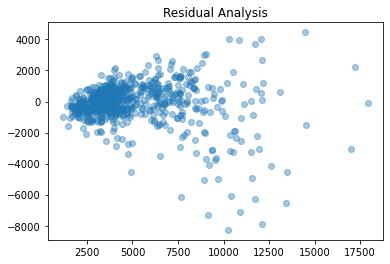

In [62]:
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()

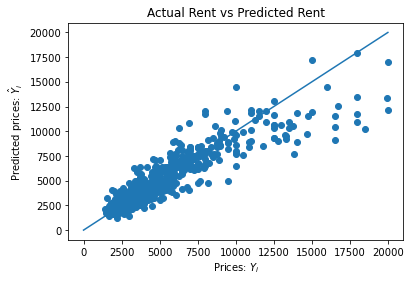

In [67]:
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

In [68]:
#Rebuild the Model using the new features as well as evaluate the new model to see if we improved

In [70]:
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In [71]:
#removing columns that are not strongly correlated to rent from the above coefficients

In [72]:
x.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [73]:
#new x, selected columns that has correlation greater than 20(value) from mlr.coef_

x = df[['bedrooms','bathrooms',

'min_to_subway',
'floor',
'building_age_yrs',

'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',

'has_gym']]

# experiment with different columns and get the R**2 VALUE to check if it got improved

##important points

Multiple Linear Regression uses two or more variables to make predictions about another variable:
y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}y=b+m 

Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values

We can use scikit-learn’s LinearRegression() to perform multiple linear regression.

Residual Analysis is used to evaluate the regression model’s accuracy. In other words, it’s used to see if the model has learned the coefficients correctly.

Scikit-learn’s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction. The best score is 1.0.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:

e = y - hat{y} (y hat is the predicted value, y is the actual value)

The coefficient R² is defined as: 1 - u/v

where u is the residual sum of squares: ((y - y_predict) ** 2).sum()

and v is the total sum of squares (TSS): ((y - y.mean()) ** 2).sum()

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

And a residual is the difference between the real value and the predicted value

The coefficients(m values) are helpful in determining which independent variable carries more weight

 A value of R²= 0 would indicate that the model fails to accurately model the data at all